In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()spo
plt.style.use('ggplot')
print(tf.__version__)


2.2.0-rc3


#Load data

In [2]:
mnist_data=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
def scale_data(train_images,test_images,train_labels,test_labels):
    
    train_images=train_images/250.
    test_images=test_images/250.
    train_images=train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
    test_images=test_images.reshape(test_images.shape[0],test_images.shape[1],test_images.shape[2],1)
    train_labels=to_categorical(train_labels)
    test_labels=to_categorical(test_labels)
    return train_images, test_images,train_labels,test_labels

In [0]:
scaled_train_images,scaled_test_images,train_labels,test_labels=scale_data(train_images, test_images,train_labels,test_labels)

In [0]:
def create_compile_model(filters):
  model=Sequential([
                    Conv2D(filters,(3,3),padding='same',input_shape=(28,28,1), activation='relu'),
                    MaxPooling2D((3,3)),
                    Flatten(),
                    Dense(10,activation='softmax')
  ])
  #model.summary()
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  return model

In [0]:
def train_model(model,train_x,train_y, n_epochs):
  return model.fit(train_x,train_y,epochs=n_epochs,validation_data=(scaled_test_images, test_labels),verbose=0)

def eval_model(model,test_x,test_y):
  return model.evaluate(test_x,test_y)[1]

In [0]:
filters=range(12,31)
epochs=range(10,16)
min_acc=0
best_accuracy=0


for epoch in epochs:
  for filter in filters:
    model=create_compile_model(filter)
    train_model(model,scaled_train_images,train_labels,epoch)
    metric=eval_model(model,scaled_test_images,test_labels)
    
    if metric>min_acc:
      best_model=model
      best_accuracy=metric




  

313/313 [==============================] - 1s 2ms/step - loss: 0.2855 - accuracy: 0.8963
Model: "sequential_181"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_181 (Conv2D)          (None, 28, 28, 19)        190       
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 9, 9, 19)          0         
_________________________________________________________________
flatten_181 (Flatten)        (None, 1539)              0         
_________________________________________________________________
dense_181 (Dense)            (None, 10)                15400     
Total params: 15,590
Trainable params: 15,590
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.2734 - accuracy: 0.9033
Model: "sequential_182"
____________________________________________

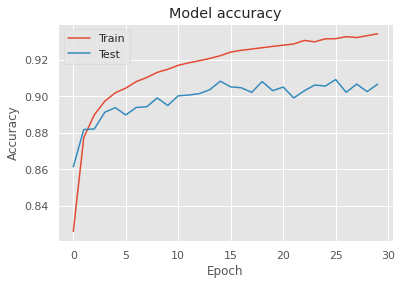

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')




#Layers

In [0]:
print(history.model.layers)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1776b06710>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f172d6d2898>, <tensorflow.python.keras.layers.core.Flatten object at 0x7f172d6d2be0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f172d6d2d68>]


In [0]:
best_accuracy

0.9027000069618225